### 從csv file獲取資料

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns

# 讀取紅酒資料集
wine_data = pd.read_csv('winequality-red.csv')
# print(wine_data['quality'].value_counts())
# 檢視資料集的前幾筆資料
print(wine_data.head())

#Replace spaces with _ for each column
wine_data.columns = wine_data.columns.str.replace(' ', '_')

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### 確認資料是否缺失

In [3]:

#We check there are no missing values and no object data types
print(wine_data.info())
print(wine_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides        

### 印出11個特徵與紅酒品質的共變數及相關係數

In [4]:

# 計算特徵與紅酒品質的共變異數和相關係數
correlation_matrix = wine_data.corr()
covariance_matrix = wine_data.cov()

# 取得特徵和紅酒品質之間的相關係數
wine_quality_correlation = correlation_matrix['quality']
wine_quality_covariance = covariance_matrix['quality']
print("covatiance: \n", wine_quality_covariance)
print("correlation: \n", wine_quality_correlation)


covatiance: 
 fixed_acidity           0.174424
volatile_acidity       -0.056476
citric_acid             0.035612
residual_sugar          0.015635
chlorides              -0.004900
free_sulfur_dioxide    -0.427907
total_sulfur_dioxide   -4.917237
density                -0.000267
pH                     -0.007198
sulphates               0.034413
alcohol                 0.409789
quality                 0.652168
Name: quality, dtype: float64
correlation: 
 fixed_acidity           0.124052
volatile_acidity       -0.390558
citric_acid             0.226373
residual_sugar          0.013732
chlorides              -0.128907
free_sulfur_dioxide    -0.050656
total_sulfur_dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


### 繪製出特徵的相關係數關係

<Axes: >

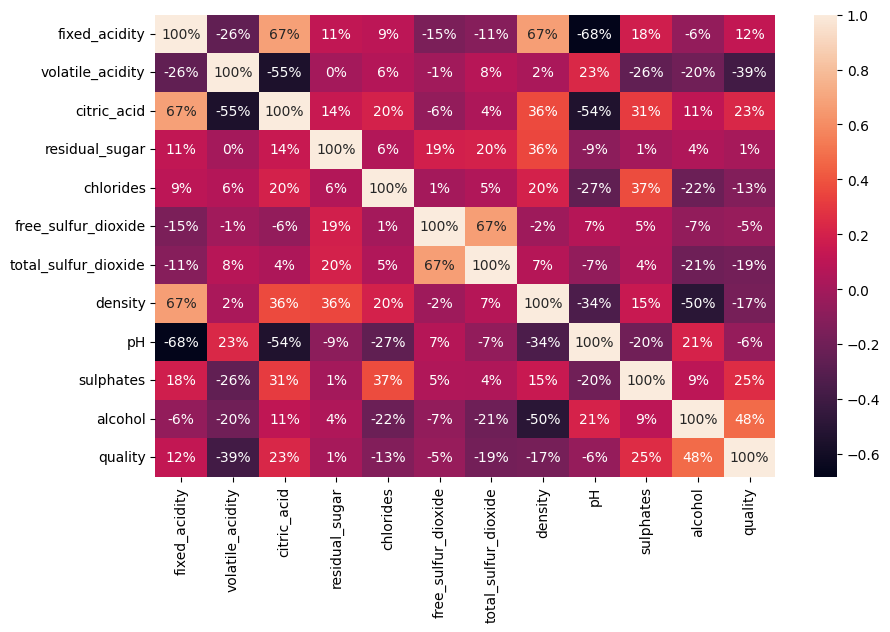

In [5]:

#Heatmap to plot all correlations between features
plt.figure(figsize=(10,6))
sns.heatmap(wine_data.corr(), annot=True, fmt='.0%')


### 畫出選定特徵（相關係數高）對於紅酒品質的圖

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

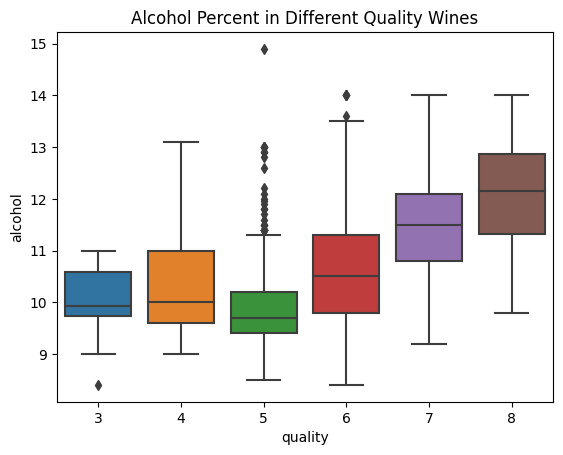

In [6]:

bp = sns.boxplot(x='quality',y='alcohol', data=wine_data)
bp.set(title="Alcohol Percent in Different Quality Wines")

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

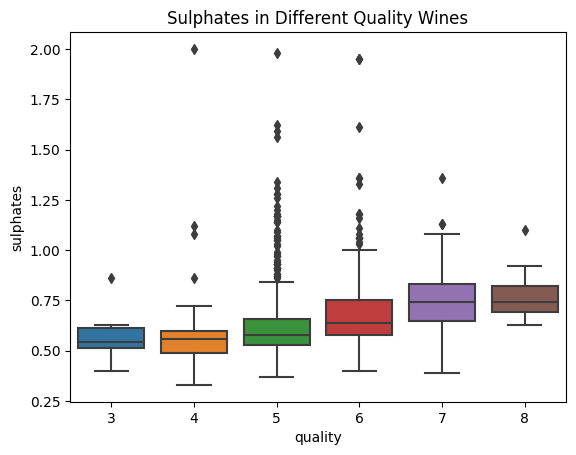

In [7]:

bp = sns.boxplot(x='quality',y='sulphates', data=wine_data)
bp.set(title="Sulphates in Different Quality Wines")


[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

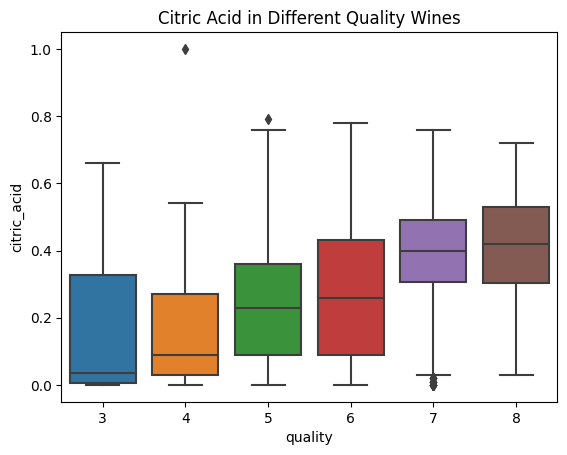

In [8]:

bp = sns.boxplot(x='quality',y='citric_acid', data=wine_data)
bp.set(title="Citric Acid in Different Quality Wines")


[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

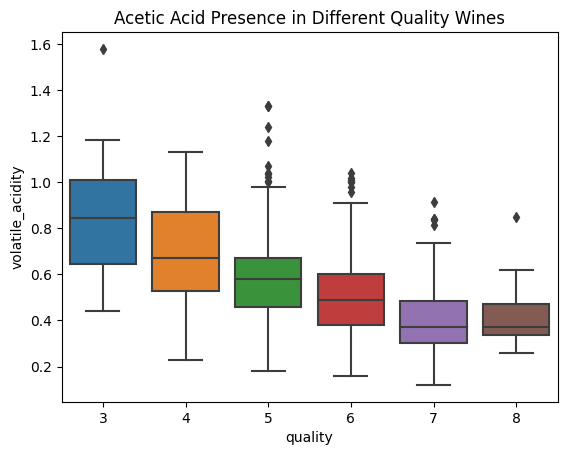

In [9]:

bp = sns.boxplot(x='quality',y='volatile_acidity', data=wine_data)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

### 使用選定的特徵做線性回歸 所得到的準確度只有55％

In [10]:
#We separe our features from our target feature (quality) and we split data intro training and test
X = wine_data.loc[:,['alcohol','sulphates','citric_acid','volatile_acidity']]
Y = wine_data.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#Fit the model and make prediction
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction_lr = regressor.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

print("Before one-accuracy report: ", classification_report(y_test, np.round(y_prediction_lr)))
print("Before one-accuracy accuracy", accuracy_score(y_test, y_prediction_lr))


Before one-accuracy report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.70      0.66       195
           6       0.51      0.60      0.55       200
           7       0.41      0.15      0.22        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.26      0.24      0.24       480
weighted avg       0.51      0.55      0.52       480

Before one-accuracy accuracy 0.5541666666666667


/Users/jenny/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jenny/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jenny/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 因此我查詢了相關資料，得出的可能是由於原資料及不平衡的關係
#### 嘗試使用SMOTE方法以達到資料平衡
#### 但得出的結果竟低於原本不使資料達到平衡之方法還低，準確度為44％
#### 在查詢其他資料時，發現了下列方程
#### 使得predict容許具有誤差範圍
#### 也就是說，在原始資料集的點誤差範圍內算做預測成功
#### 以提高準確度
#### 使用此方法可有效提高準確度至98％
#### 此方法也常應用在日常生活中

In [11]:
def one_accuracy(predicted, true):
	i = 0
	for x,y in zip(predicted,true):
		if(abs(x-y)==1):
			predicted[i] = y
		i = i + 1

one_accuracy(y_prediction_lr, y_test)


print("After one-accuracy report: ", classification_report(y_test, np.round(y_prediction_lr)))
print("After one-accuracy accuracy", accuracy_score(y_test, y_prediction_lr))


After one-accuracy report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.76      0.87        17
           5       0.99      1.00      0.99       195
           6       0.97      1.00      0.98       200
           7       1.00      0.98      0.99        61
           8       1.00      0.50      0.67         6

    accuracy                           0.98       480
   macro avg       0.83      0.71      0.75       480
weighted avg       0.98      0.98      0.98       480

After one-accuracy accuracy 0.98125


/Users/jenny/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jenny/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jenny/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
